In [34]:
import pandas as pd
import numpy as np 
import matplotlib as mlp 
import seaborn as sns 
import re

from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy import tag

import os
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

kkma = Kkma()

In [35]:
data = pd.read_csv('data_res.csv', index_col = 0)
data = data.drop(columns=['수요'])

In [162]:
soft = data[data['업종분류'] == '데이터베이스 및 온라인정보 제공업']
soft = soft.dropna(subset= '이용하는기술스택/우대사항')

# 한글

In [167]:
ll = ' '
for www in soft['이용하는기술스택/우대사항']:
    ll += www


stop_words_1 = '''이해 분 서버 개념 동기 문제점 개선의지 전문 해결법 구축 브라우저 개발자이지만 업무용 방지 대책 수립 소규모 생명 중시 재발방지대책 재발 자존 변화 적응 마이크로 로드 대응 페어 복잡 심사 패턴 차원 이지만 프롬 아이디어 주도적 효율적 기획 시너지 타인 동기 편입 최적화 구현경험 도전 거부감 테크 허들 심리적 도적 개념 동시성 문제 십 오너 프로토 주도적인 개별 보훈대상자 적극적전공자 체인 대리 병역 병역특례 특례 학습 문서화 측정 엔지니어 역량 수정 파악 학위 효율 욕구 기록 동료 형상 무리 고도 성장 점진적 주실 원리 항상 열정적 만난 반대 기한 토끼 배려 마음 파인 능동적 토끼굴 굴 목표 책 최적 이후 배려심 하우스 토대 교체 인센티브 복리후생비유경험자 비유 내시 실천 비즈니스 기여경험여 대시 보드 단위테스트 종단 종단테스트 기능테스트 보훈 외주 모터 능통 능통자 디스 학적 프리 소통 자세 적합 차량 3차 14 능력 블록 해결 완성도 제작 업자 온라인 시간동안 원칙 베스트 4주 이중 복수 전공자분 27001 후보자분의 역할수행 스의 드리고 안내드리고 소정의 기간동안 파일 출하신 3시간 대해 통화 지향점 채용전형 나열 지식 이너 2차면접 1차면접 인성 혹 플리 곤 비트 럼 록 그레이 더블 핵심가치 2인 다종 D 의욕 탐지 부하 계신 배치 자차 관심 배포 마인드 문제 D 허브 스펙 처리 영량 전화 지식대용량 성능 엔드 지식 ㅇㅇ 소프트 품질 노력 사용중 숙달 성찰 바꾸기 채용절차 환경내 경내 듀 진단 내외 오프라인 스트레스 평판 평판조회 조회 결산 텔 최종합류 처우협의 기술과제 전달 주차별 차별 지연 직접 캡 연계해본 경험해본 8년 19 시차 4대보험 주5일 릉 랏 방문 정비 스플 적적 긍적적 기기 긍 코드 헬스 제로 빌드 5호선 화곡역 5분 10분이내 럭 난독 하위 호환 100만 폰 5일제 일제 17 강서 강서구 화곡동 건전 1회 사내 저녁 후생비 저녁식대 야간 생일 결혼기념일 분당 스마트 변경 시장 27701 유기 5인 실시 활성화 점수 성남 성남시 분당 촌 연세대 연세대학교 2곳 곳 분당 분당구 판교 723 404 404호 서대문 서대문구 연세 광 광혜관 라온 메디 스테이지 차피 4918 회수 의의 동반 축하 부모 경조사비 조사비 자율복장 복장 회사콘도 콘도 육아 워크샵 샵 격년 테니스 조사용품 용품 포상 10년 포상금 여름 부서별 회식비 음료 각자 개개인 주인 굿 준수 좋아 7년 무엇인가 인가 콘 솔 다루 커피챗 브렌 전략 장기근속 근속 장기 서울시 사용기간 소유자 보유자 2가지 스타일 팬 덤 분실무 견고 분우대사항 달성 지속가능 기법 존중 결정 근무환경 포구 중간 활동  중간관리자 관리자 직장 요원 더쉽 가지신분 근거주자 주자 장기근무가능자 대인 직업 훈련 기관 직업훈련기관 효과적인 인재 인재영입 영입 매니저와의 와의 주의 주의사항 동일 복리 복리후생 후생 일반적 운동 행복 행복하자 하자 몸 두시 기업내 커리어 여의대 108 파크 파크원 타워1 38 38층 상위 연봉 오전 11 11시 생략 연결 쇼핑 퇴직금 연차 연차휴가 모성 모성보호휴가 경조사 경조휴가 경조금 조금 화환 효과 피해자 오신 최선의 선의 대안 지인 시일 담당자 연락 방안 컨트리 컨트리뷰 무관 비용절감 절감 부담 휴양 핀 브라 우징 부탁 방법 위주 수행업무 개인홈페이지 홈페이지 1시간 정식 암호 화폐 어린이 슬픔 화곡 기쁨 장례 지인분 1년 여정 비어 90 90분 스킬 인상 셰어 라운드 6개월 있음 최소화 주민 주민번호 번호 개인정보 삭제 요함 중단 어제 오늘 이것 선배 설명 표현 안정성 삶 몰입 종속 일정 산정 2회 포지션 편안 출근버스 대중교통 운행 주택 주택자금대출 자금 통근 공간 단체보험제도 3인이상 경청 보완 사기 열정 포토 파이어 확정 주기 즉시 용인 원활 동작 용인시 수지구 09 상여금 업무우수자 기혼 기혼직원 식사 청년 내일 음공제 공제 18일 미사용시 사용시 수당 상금 임직원 건강검진비 보조 소개서 옵션 톤 해커 참여해본 전직 모두 현역 불가 본인만 바른 예정경력기술서 기술서 필요시 셜 3인 습관화 현지 메시 회복 의료비 단체보험 차이점 지가 임원진 대신 과제테스트 식비 10만 상당 건강비 교육비 정기 리프 리프레쉬 쉬 독서 독서모임 모임 시즌 멤버쉽단체 고객사 조화 주차 이자지원제도 이자 주거 대출 유의사항 최종결과 전월세 모집 조기 동의 허위사실 비지능 구매 부족 실적 모노 회의 공감 답변 명령 미들 설치 숙박 학점 학점은행 은행 성취감 선호해 호해 벡 문화적 검사 추가 유연 유연근무제도 제도 셋째 셋째주 금요일 1시 넷째 넷째주 월요일 출근 롱 롱위켄트 켄드 야근 식대 심야 교육지원 2년시 채널 튜브 관제 대한 계속 랍격자 수시 마감 3년이상 365 보수성 친숙 복지비 휴가비 통신비 종합건강검진 이해심 모범 애정 순위 엣 귀하 사회 이바지 라도 분1 만들기 13버전 엘 스틱 리초트 급여보장 초과 링크 뮤 우수자 버전 중앙 습득 참가 학술 게재 파이프 준비 요구사항 단계 추천해 공통 해당 국가 유공자 장애인 취업 취업보호대상자 대상자 관계법령 법령 7일 며칠 헥 날 시작 혜택 개선해본 현재 이내 이메일 간의 리팩 토스 플레이스 함 창업 처우조건 포스 타입 내규 1일 8시간 수습조건 근무장소 장소 4길 강남역 1번 출구 2분 지원시 참고 참고사항 모든 권장 성공 사례 포함 현장 손 소정 참여비 간소화 4년 성과 블랙 박스 자격 취득자 투브 이외 라우드 워크플 넷 신규 체계화 장려 석식 신청 커피 무제한 동급 장비 제품 퇴근 교통비 연말 겨울 방학 별도 승인 워라 보장 재택근무 비용 도서 구입 수업 환경 케어 중시 펀 마크 비전 중요성 신분 출퇴근 근무시간 조정 동시 해외여행 결격 의사 관적 유사 유지 보수 지면 264 탑재 보호 사원 우수 기본적인 지급 결격사유 시용 사유 운전 글 페이스 북 4인 전체 접속 2,000 2,000명 수용 뉴 럴 자율 주행 지리 체계 카페테리 테리 건강 검진 경조 수원 위치 고용 고용형태 검출 추적 86 64 버싱 전형절차 면접 제출서류 사지원서 지원서 양식 명절 선물 동호회 종합검진 독감 독감주사 마이 제외 모습 부여 센터 센터필드 필드 타워 교육장 경기 경기도 우대요건 요건 규모 소지자  13482주사 국내 출산 자녀 입학 포 비즈 니스 요청사항 후속 영업 끈기 관점 소유 도입 필요 경진 검수 반영 인식 지원자 안식 휴가 지원금 6년 9 9년 근속 현금 복지 포인트 편의 시설 녀 수면 수면실 간식 휴식 카페 성향 추구 결과물 연구팀장 팀장 인력 분 지향 작성 버스 재직 근무요일 체제 부서 우선 정리 읽기 쓰기 구상 독성 유니 영역 의식 전장 26262 특성 규칙 중점적 지표 유의미 고가 용성 졸업 수자 역할 번 관련교육 2년 신용 장애 산업과 수자1 4 분관련학과졸업 상응 동종 전사 유의 리드해본 구분 화면 오너 십 본인 파트 지능 발전 편집 욕망 거리 기타 크립 서비스여 혼자 집 벨 벨루가 루가 큐칙 주류 산없과 기능 분과 대상 인공 제안구애 주요 작업 시험 일부 최소 3개 1개 플 케이 인더스 트리 요구 운 영해 운영해 가능자1 너리 취약 뿐 중요시 빅 상태 비 실행 반복 레드 요청 일상 파 파티 응용 셋 진심 기업 실제 대체 분위기 자기주 다량 만족 중요 여기 실패 창의 방향 구조적 활용해 용해 각종 주도 자기 사이트 종사 수준 맥락 통합적 설계해본 요일 극복 후보자 치열 논의 수준의 커버 리지 다수 유저 오스 결제 플랫 펌 드로 이드 추천 다각 다각도로 도로 오피스 총괄 참석 전반적 핏 내부 상황 변동 내용 스스로 설득 시간 체크 합류 종합적 영향 필수 주소 선택 형시 1로 로 최대 등기 확인 앞 기대 실무진 대면 60 60분 가량 중심적 이야기 자리 시도 5일 일 40 40시간 7시 30 30분-10시 -10 30분 처우 보상 개인 바탕 협의해 절차 입사 입사지원 지원 재직해본 형성 누비 랩 개발팀 8 다음 션 근무지 서울특별 서울특별시 625 덕명 덕명빌딩 6층 삼성 삼성역 도보 3분  최고 장벽 기준 사업부 자체 프로 동안 급여 100 지금 평가 연장 종료 과정 제출 증빙 증빙자료 자료 사실 허위 기재 발견 취소 콜 8 론 재미 직군 사용가능 통해 자유 공학 기본 장단점 채용 실무 경영진 경우 3개월 수습 수습기간 적인 리스 꿈 우리 초기 스타트 업 개발실장 실장 개발본부장 본부장 사랑 일 원 우대사항 사항 접목 가능자 런 칭 3년 사업 직무 발생 때 법 모색 처음 끝 1인 출시 경제력 기존 저하 으 항상 고심 표준 반응 진행 웨어 메타 지속적 주변 대화 객체 2 3 거시 구성 활용 관리 시스템 사용 관련 타 언어 프레임 워크 전자 서명 설정 분야 생성 대회 입상 전공 석 소지 국제 안 중인 제공 강화 컴퓨터 과학 기반 최신 재현 데 수 보신 도구 다양 기술 적용 공유 적극 참여 아 키 텍 베이스 가능 개선 보유 이슈 사용경험 망 공급 물류 이해도 이용 통합 인증 머신 러닝 연동 구현 아래 과 라 서울 강남 강남구 테헤란 7 7길 길 12 허 허바허바 바 질문 무엇 백 보유자 즐거움 새  의견 재생 전기 누구 세상 지배 디드 무선 충전 빌딩 3층 튜 링 층 말 역 역삼 역삼동 삼동 문화 핵심 가치 감당 한마디 외면 감사 제각 해보신 인터 렉 접근 근무 근무조건 조건 근무형태 형태 정규직 개월 사용 사용기간 기간 후 전환 여부 티브 욕심 사고 서류 최종 결과 결과안내 안내 1주 주 2주 주 소요 최종합격 합격 불합격 서류전형 전형 인터뷰전형 서류접수 사전 사전과제 과제 인터뷰 1 1차 차 2 2차 우대 자신 방식 트러블 슈팅 강점 가지신 5 5년 년 이상 외 수행 스크 래핑 선언 레 어디 욕 의지 검색 매력적 풀 을 단위 경험자 고려 사용자 까에 대 고민 리싱 싱 사람 평소 생각 흥미 저희 마지막 그간 회사 생활 점 기억 하나 조직 현실 내가 지금 무언가 하루하루 전국 내 스택 중심 이력서 첨부 서류 검토 도움 상용 오픈 소스 기여 기여해본 해본 딥  '''
word_tokens_1 = kkma.nouns(ll)

result_2 = [word_1 for word_1 in word_tokens_1 if not word_1 in stop_words_1]

print('불용어 제거 전 :',word_tokens_1) 
print('불용어 제거 후 :',result_2)

불용어 제거 전 : ['멀티', '쓰레드', '서버', '웹', '웹소켓', '소켓', '클라우드', '구축', '메타', '메타버스', '버스', '레', '레거시', '거시', '분석', '역량', '데이터', '개선', '개선의지', '의지', '풀', '풀스택', '스택', '협업', '툴', '관련', '관련경험', '경험', '포트폴리오', '서류', '서류검토', '검토', '알고리즘', '데이터구조', '구조', '프론트', '프론트엔드', '엔드', '주도적', '효율적', '개발', '개발환경', '환경', '기획', '동료', '시너지', '해결', '해결법', '법', '프로젝트', '스타트', '스타트업', '업', '대기업', '프로그래밍', '전문', '백', '백엔드', '오너', '오너십', '십', '성장', '개발자', '디자이너', '기획자', '적극적', '문제', '문제해결', '커뮤니케이션', '프로세스', '스프린트', '배포', '자동화', '지식', '비', '비동기', '동기', '처리', '처리개념', '개념', '안', '안드로이드', '드로', '이드', '블루투스', '아키텍처', '능력', '앱', '타인', '소스', '소스코드', '코드', '대용량', '웹서비스', '서비스', '컨테이너', '모니터링', '함수', '동시성', '모바일', '크로스', '크로스플랫폼', '플랫폼', '인프라', '프로토', '프로토콜', '콜', '주도', '주도적인', '적인', '테스트', '테스트코드', '인공', '인공지능', '지능', '과제', '과제전형', '전형', '집', '집계', '계', '분산', '스트', '스트레이션', '레이션', '광고', '개별', '보훈', '보훈대상자', '대상자', '컴퓨터', '컴퓨터공학', '공학', '소프트', '소프트웨어', '웨어', '소프트웨어공학', '개발경험', '정부', '정책', '컴포넌트', '워크', '워크스페이스', '스페이스', '멀티모듈

<function matplotlib.pyplot.show(close=None, block=None)>

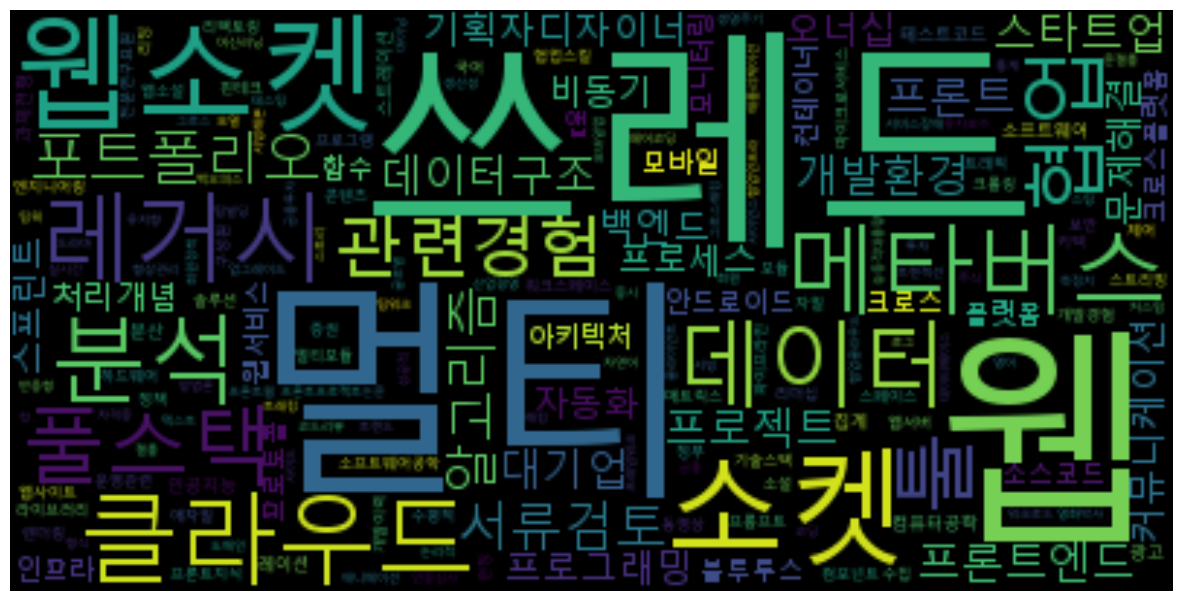

In [168]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf' ).generate(' '.join(result_2))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

# 영어

In [171]:
result_3 = ''

for sss in soft['이용하는기술스택/우대사항']:
    word_temp_2 = re.findall(r'[a-zA-Z\s]+', sss)
    result_3 += ', '.join(word_temp_2)
result_3 = result_3.split(', ')

In [174]:
stttt = ''' S s O o XD X D B x X E end Next Security Search AWSDDD AWS'''
result_res = [j for j in result_3 if not j in stttt ]

<function matplotlib.pyplot.show(close=None, block=None)>

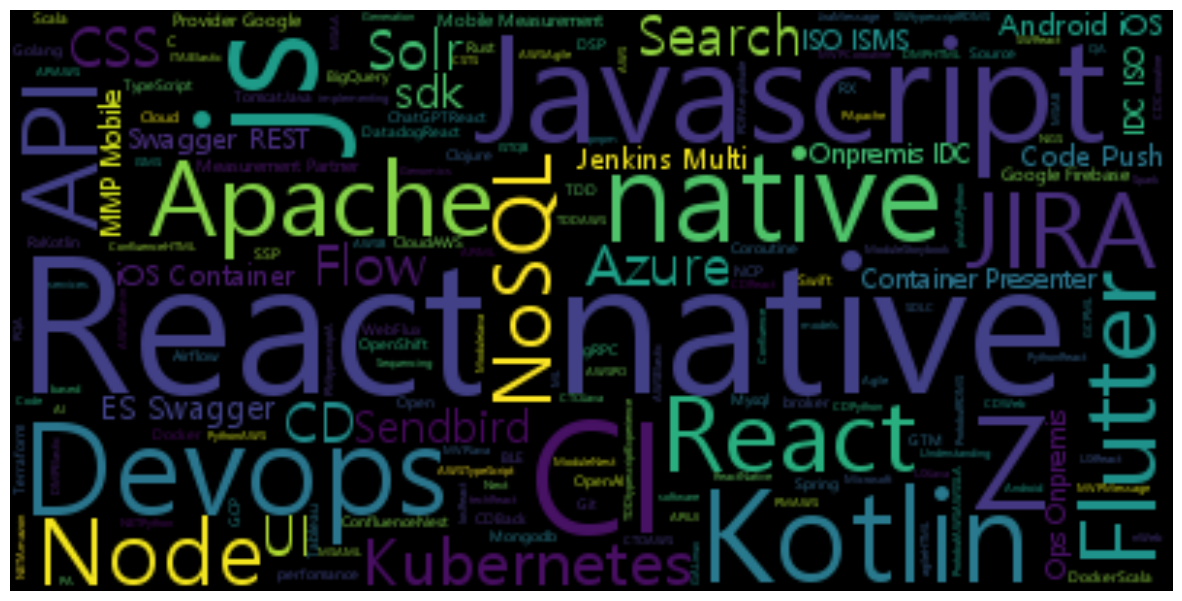

In [175]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf').generate(' '.join(result_res))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show